<a href="https://colab.research.google.com/github/Simonblancodas/Advanced-Controls---Realization-of-State-Space/blob/main/Final_Project_Simon_Blanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this first block is to import all the Python libraries that will be used along  the program

import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Here we define mathematical constants that may be used along the program

# Sheer Modulus of Elasticity:
G_steel = 10
G_aluminium = 10/3

# Modulus of elasticity:
E_steel = 100
E_aluminium = 100/3

# Forward for Robotic Planar Manipulator

  ## The following program will take as input the definitions of link-joint pairs and return all robotic parameters necessary for DH parameter configuration of a Manipulator. Further, it will provide cartesian position of end effector and last joint from Forward Kinematic calcuations.

  ## Finally another portion will define trajectories of a single joint or point in space vs time.

  To describe a joint-link pair we will use the standard convention of Denavit-Hartenberg notation, where pair are identified by a number and defined by four (4) parameters: link length, link offset, joint twist, and joint angle as seen in the picture below:

  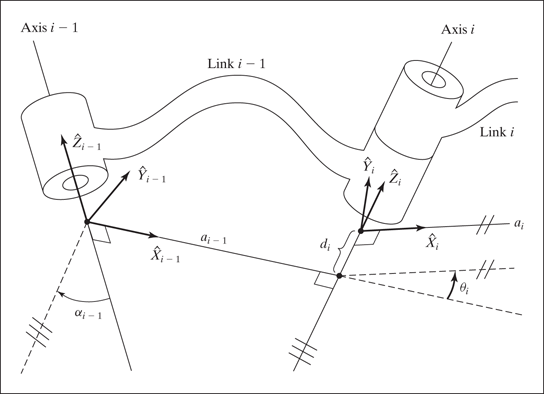

  The homogeneous transform of a joint-link pair defined by DH parameters is given by:

  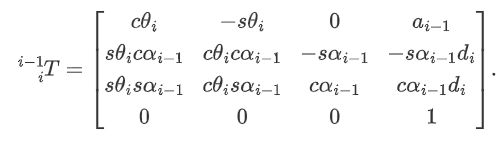

  

In [ ]:
class Joint_Link: # this object represents the joint-link pair described with DH parameters
  def __init__ (self, name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity):
    self.name = name
    self.number = number
    self.length = length
    self.twist = twist
    self.weight = weight
    self.offset = offset
    self.angle =  angle
    self.min_angle = min_angle
    self.max_angle = max_angle
  
  def hTransform(self):
    '''this method returns the Homogeneous Transform that describes the 
    joint-link pair using DH parameters'''
    return np.array([[math.cos(math.radians(self.angle)), -math.sin(math.radians(self.angle)), 0, self.length]
                     ,[math.sin(math.radians(self.angle))*math.cos(math.radians(self.twist)), math.cos(math.radians(self.angle))*math.cos(math.radians(self.twist)), -math.sin(math.radians(self.twist)), -math.sin(math.radians(self.twist))*self.offset]
                     ,[math.sin(math.radians(self.angle))*math.sin(math.radians(self.twist)), math.cos(math.radians(self.angle))*math.sin(math.radians(self.twist)), math.cos(math.radians(self.twist)), math.cos(math.radians(self.twist))*self.offset]
                     ,[0,0,0,1]])

In [ ]:
class End_effector(Joint_Link):
  def __init__ (self, name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity, current_position):
    Joint_Link.__init__ (self, name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity)
    self.current_position = current_position


In [ ]:
class Manipulator:
  def __init__ (self, name, joints_ht, end_effector_ht):
    self.name = name
    self.joints_ht = joints_ht
    self.end_effector_ht = end_effector_ht
    self.dof = len(self.joints_ht)

   # DISCLAIMER: the following recursive function was possible with the help of ChatGTP
   # I was getting the following error that I was not able to debug: TypeError: Manipulator.forward_Kinematics_joints() takes 1 positional argument but 2 were given
   # I could not figure out that to have a recursive function in a class I needed to call the class for recursiveness, not the method
  def forward_Kinematics_joints(self):
      if len(self.joints_ht) == 1:
          return self.joints_ht[0]
      elif len(self.joints_ht) == 2:
          return np.matmul(self.joints_ht[0], self.joints_ht[1])
      else:
          mid = len(self.joints_ht) // 2
          left = Manipulator("left", self.joints_ht[:mid], self.end_effector_ht)
          right = Manipulator("right", self.joints_ht[mid:], self.end_effector_ht)
          return np.matmul(left.forward_Kinematics_joints(), right.forward_Kinematics_joints())

  def forward_Kinematics(self):
    FK_manipulator = Manipulator.forward_Kinematics_joints(self)
    return np.matmul(FK_manipulator, self.end_effector_ht)

  def current_Joint_angles(self):
    joint_angles = []
    for transform in self.joints_ht:
      joint_angles.append(np.arccos(transform[0][0])*180/math.pi)
    return joint_angles

# Testing Joint_Link and Manipulator Classes

In [ ]:
# Ankle(joint_link#1)
name = 'ankle'
number = 1
length = 300
twist = 0
offset = 0
angle = 0
min_angle = 0
max_angle = 60
weight = 50
shear_modulus_elasticity = G_aluminium
modulus_elasticity = E_aluminium

Ankle_link = Joint_Link(name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity)

print('current joint angle is: ', Ankle_link.angle)
Ankle_link.angle = 60
print('current joint angle is: ', Ankle_link.angle)
print('The Homogeneous Transform of Link#',Ankle_link.number,'is: ' ,'\n', Ankle_link.hTransform())

current joint angle is:  0
current joint angle is:  60
The Homogeneous Transform of Link# 1 is:  
 [[  0.5        -0.8660254   0.        300.       ]
 [  0.8660254   0.5        -0.         -0.       ]
 [  0.          0.          1.          0.       ]
 [  0.          0.          0.          1.       ]]


In [ ]:
# Knee(joint_link#2)
name = 'knee'
number = 2
length = 800
twist = 0
offset = 0
angle = 0
min_angle = 0
max_angle = 120
weight = 100
shear_modulus_elasticity = G_aluminium
modulus_elasticity = E_aluminium

Knee_link = Joint_Link(name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity)

print('current joint angle is: ', Knee_link.angle)
Knee_link.angle = 60
print('current joint angle is: ', Knee_link.angle)
print('The Homogeneous Transform for the',Knee_link.name,'Link is: ' ,'\n', Knee_link.hTransform())

current joint angle is:  0
current joint angle is:  60
The Homogeneous Transform for the knee Link is:  
 [[ 5.00000000e-01 -8.66025404e-01  0.00000000e+00  8.00000000e+02]
 [ 8.66025404e-01  5.00000000e-01 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
# Hip(joint_link#3)
name = 'hip'
number = 3
length = 1000
twisth = 0
offset = 0
angle = -5
min_angle = -5
max_angle = 120
weight = 100
shear_modulus_elasticity = G_aluminium
modulus_elasticity = E_aluminium

Hip_link = Joint_Link(name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity)

print('the length of the link that runs along the thigh is: ', Hip_link.length, 'milimeters, or one meter long for this case')
Hip_link.angle = 30
print('current joint angle is: ', Hip_link.angle)
print('The Homogeneous Transform for the',Hip_link.name,'Link is: ' ,'\n', Hip_link.hTransform())

the length of the link that runs along the thigh is:  1000 milimeters, or one meter long for this case
current joint angle is:  30
The Homogeneous Transform for the hip Link is:  
 [[ 8.66025404e-01 -5.00000000e-01  0.00000000e+00  1.00000000e+03]
 [ 5.00000000e-01  8.66025404e-01 -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
# Center of Gravity == End Efector 
name = 'Center of Gravity'
number = 4
length = 100
twist = 0
offset = 0
angle = 90
min_angle = 0
max_angle = -90
weight = 100
shear_modulus_elasticity = G_aluminium
modulus_elasticity = E_aluminium
current_position = 45

COG = End_effector(name, number, length, twist, offset, angle, min_angle, max_angle, weight, shear_modulus_elasticity, modulus_elasticity, current_position)

print('the Center of Gravity of the body is usually located', COG.length, 'milimiters from the hip joint, close to the belly button')
COG.angle = 30
print(COG.angle)
print(COG.hTransform())

the Center of Gravity of the body is usually located 100 milimiters from the hip joint, close to the belly button
30
[[  0.8660254  -0.5         0.        100.       ]
 [  0.5         0.8660254  -0.         -0.       ]
 [  0.          0.          1.          0.       ]
 [  0.          0.          0.          1.       ]]


In [ ]:
print('from our joint_link PObjects we have the joint angles as:', Ankle_link.angle, Knee_link.angle, Hip_link.angle, '\n')

joints_transforms = [Ankle_link.hTransform(), Knee_link.hTransform(), Hip_link.hTransform()]

Robot = Manipulator('Talos', joints_transforms, COG.hTransform())

print('From our Manipulator Object the current joint angles are:', Robot.current_Joint_angles(), '\n')

print(Robot.name, 'is a Lower Limb Exoskeleton Assistive robot to help users in Sit to Stand transitions', '\n')

print("the current cartesian position of the hip joint is: ", "\n", Robot.forward_Kinematics_joints(), '\n')

print("the current cartesian position of the Center of Gravity is: ", "\n", Robot.forward_Kinematics())

from our joint_link PObjects we have the joint angles as: 60 60 30 

From our Manipulator Object the current joint angles are: [59.99999999999999, 59.99999999999999, 29.999999999999993] 

Talos is a Lower Limb Exoskeleton Assistive robot to help users in Sit to Stand transitions 

the current cartesian position of the hip joint is:  
 [[-8.66025404e-01 -5.00000000e-01  0.00000000e+00  2.00000000e+02]
 [ 5.00000000e-01 -8.66025404e-01  0.00000000e+00  1.55884573e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

the current cartesian position of the Center of Gravity is:  
 [[-1.00000000e+00 -4.54977857e-16  0.00000000e+00  1.13397460e+02]
 [ 4.36652126e-16 -1.00000000e+00  0.00000000e+00  1.60884573e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


# Trajectory

The trajectory class allowes us to find the value of a position variable in function of time, and as we assume that this trajectory describes a cubic function, and that the motion starts and ends in rest, we can then also find the trajectory of velocity and acceleration with the 1rst and 2nd derivatives.

In [ ]:
class trajectory_joint_space: # this function allowes us to find the one joint angle in function of time 
                                  # we must assume that the movement starts and ends in rest.
                                  # we muset assume the trajectory is defined by a cubic function
  def __init__(self, xf, x0, tf, t0 = 0):

    assumptions = 'cubic trajectory of the position variable, the movement starts and ends in rest.'
    if tf < 0:
      return 'time variables cannot be negative'
    elif t0 < 0:
      return 'time variables cannot be negative'
    if tf < t0: # this line makes sure the time is positive 
      return 'the initial time (t0) must be less than the final time (tf)'
    self.t0 = t0# this is the initial time
    self.tf = tf# this is the final time
    self.x0 = x0 # this is the value of the position variable at initial time
    self.xf = xf # this is the value of the position varialbe at the final time
  
    # these are the coeficients of the cubic equation 
    self.a0 = self.x0
    self.a1 = 0
    self.a2 = (3/self.tf**2)*(self.xf-self.x0)
    self.a3 = -(2/self.tf**3)*(self.xf-self.x0)

  def position_at_Time(self, time): # this method returns the current joint angle 
      return self.a0 + self.a1*(time) + self.a2*(time**2) + self.a3*(time**3)

  def velocity_at_Time(self, time): # this method returns the current joint rate / angular velocity
      return self.a1 + self.a2*2*(time) + self.a3*3*(time**2)

  def acceleration_at_Time(self, time): # this method returns the current joint angular acceleration 
      return self.a2*2 + self.a3*6*(time)

  def mid_point_position(self):
      return self.position_at_Time(self.tf/2)

  def mid_point_velocity(self):
      return self.velocity_at_Time(self.tf/2)
      
  def mid_point_acceleration(self):
      return self.acceleration_at_Time(self.tf/2)

  def plot_position_Trajectory(self):
    t = np.linspace(self.t0, self.tf, 100)    
    angle = self.position_at_Time(t)
    plt.plot(t, angle)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Joint Angle Over Time')

    # Show the plot
    plt.show()
  def plot_velocity_Trajectory(self):
    t = np.linspace(self.t0, self.tf, 100)    
    angle_rate = self.velocity_at_Time(t)
    plt.plot(t, angle_rate)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Angle rate')
    plt.title('Joint Angle Rate Over Time')

    # Show the plot
    plt.show()
  def plot_acceleration_Trajectory(self):
    t = np.linspace(self.t0, self.tf, 100)    
    angle_rate = self.acceleration_at_Time(t)
    plt.plot(t, angle_rate)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Angle rate')
    plt.title('Joint Angle Rate Over Time')

    # Show the plot
    plt.show()

In [ ]:
STS_trajectory_1 = trajectory_joint_space(0, 77, 5)
STS_trajectory_2 = trajectory_joint_space(90, 0, 5)

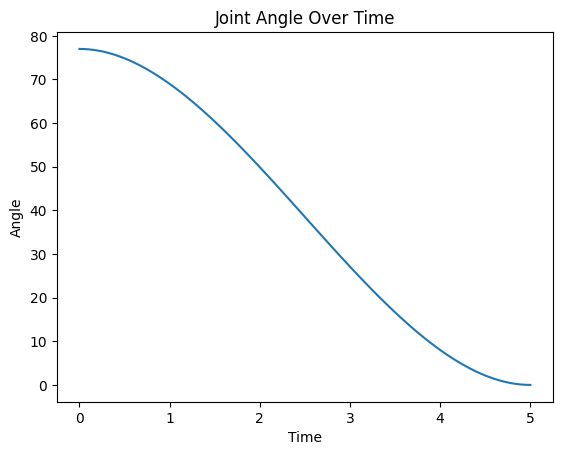

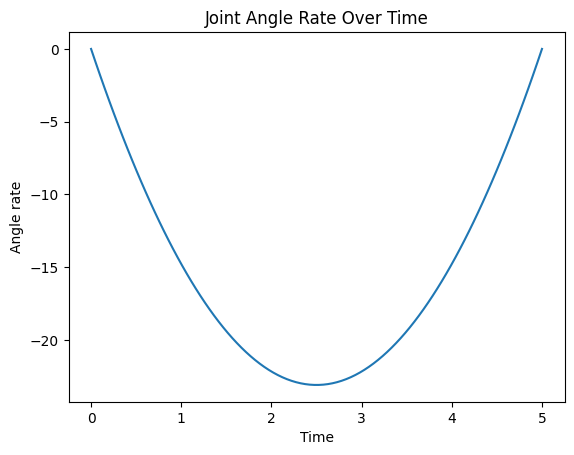

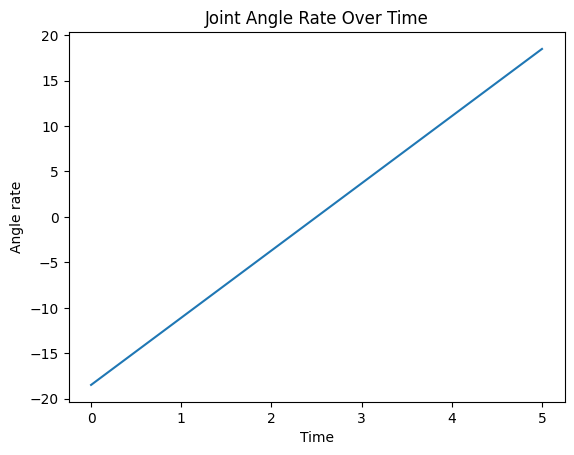

the angle at the middle of the trajectory is:  38.5
the angle rate at the middle of the trajectory is:  -23.100000000000005
the angle acceleration at the middle of the trajectory is:  -3.552713678800501e-15


In [ ]:
STS_trajectory_1.plot_position_Trajectory()
STS_trajectory_1.plot_velocity_Trajectory()
STS_trajectory_1.plot_acceleration_Trajectory()

print("the angle at the middle of the trajectory is: ", STS_trajectory_1.mid_point_position())
print("the angle rate at the middle of the trajectory is: ", STS_trajectory_1.mid_point_velocity())
print("the angle acceleration at the middle of the trajectory is: ", STS_trajectory_1.mid_point_acceleration())

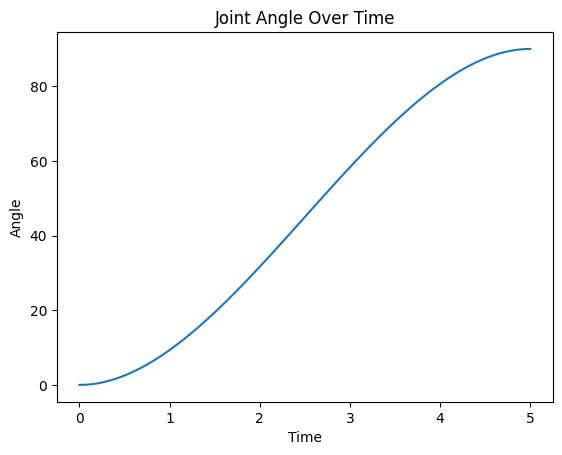

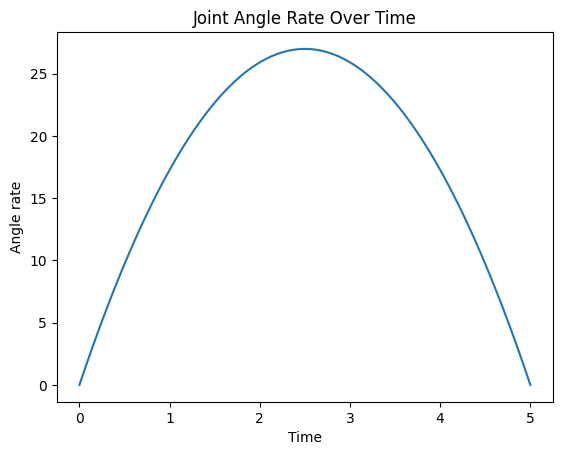

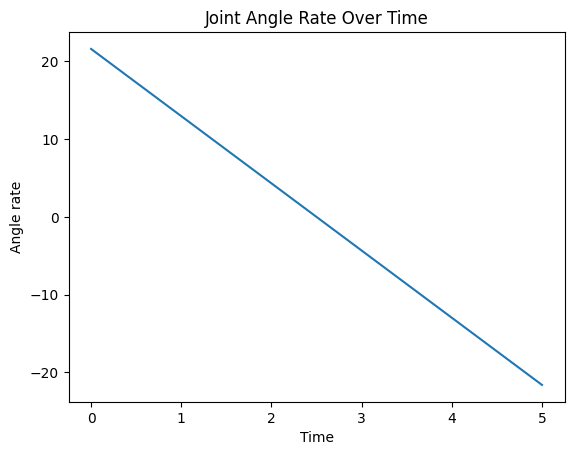

the angle at the middle of the trajectory is:  45.0
the angle rate at the middle of the trajectory is:  26.999999999999993
the angle acceleration at the middle of the trajectory is:  -3.552713678800501e-15


In [ ]:
STS_trajectory_2.plot_position_Trajectory() 
STS_trajectory_2.plot_velocity_Trajectory()
STS_trajectory_2.plot_acceleration_Trajectory()

print("the angle at the middle of the trajectory is: ", STS_trajectory_2.mid_point_position())
print("the angle rate at the middle of the trajectory is: ", STS_trajectory_2.mid_point_velocity())
print("the angle acceleration at the middle of the trajectory is: ", STS_trajectory_2.mid_point_acceleration())

# Creating a Dictionary of many possible trajectories

The dictionary will store the coeficients for each different possible trajectory

Later we'll write the main part of the program that given a set of coeficients will find if the trajectory is in the database, if not it will add it, if it is it will return the coefficients, initial and final angles and times. 

In [ ]:
trajectories_class = {} # this is an empty dictionary to populate with a loop
for initial_pos in range (40, 80): # loop to go over all possible initial possitions of a tipical range of motion
  for final_pos in range (81, 120): # loop to go over all possible final possitions of a tipical range of motion
    for time in range(81, 120): # loop to go over all possible ranges of time (tipical sit to stand lasts 1.2 to 2 seconds)
      trajectories_class[str(final_pos) + "," + str(initial_pos) + "," + str(time)] = trajectory_joint_space( final_pos, initial_pos, time)

      # NOTE: this loop creates an class instance for each position-time configuration, hence each value is an instance and not a constant, 
      # we still need to create the dictionary of the coeficients of the cubics that describe each trajectory.

In [ ]:
trajectories = {} # here we create the dictionary of trajectory coeficients, as it is what we would want to know from a configuration of positions and time of execution
for keys in trajectories_class:
  trajectories[str(keys)] = [trajectories_class[keys].a0, trajectories_class[keys].a1, trajectories_class[keys].a2, trajectories_class[keys].a3]

In [ ]:
print('from the dictionary of possible trajectories: ', trajectories['81,40,100'])

print('from the class method: ',[trajectory_joint_space(81, 40, 100).a0, trajectory_joint_space(81, 40, 100).a1, trajectory_joint_space(81, 40, 100).a2, trajectory_joint_space(81, 40, 100).a3])


from the dictionary of possible trajectories:  [40, 0, 0.012299999999999998, -8.2e-05]
from the class method:  [40, 0, 0.012299999999999998, -8.2e-05]


# Conclusion:

This Object oriented program is meant to help develop the mathematical results of many robotic operations 

>The problem that needs to be solved for any rigid robotic configuration is repetitive and besides the determination of the inverse kinematics and those associated with this (not part of the scope of this program), it is not complex, as the operations are linear. These are mainly the Forwared Kinematic problem and Trajectory definition.

>>The Computational Complexity of solving these problems is directly proportional to the Degrees of Freedom (DOF) that the robot has. This measure determines the space or physical coordinates with different poses that the robot can adopt. Hence the program must loop over every possible configuration to determine the space that the robot can reach.
This means that on average the time complexity of the programs tend to be O(n**DOG). 

>A powerful alternative to solve this problem is taking advantage of the low cost of memmory space that is the standard in the current technological status of computers, and the power of Hash tables to have a time complexity of constant time.

>>Hence, we create a dictionary with all possible configurations, and using as the keys the same parameters with the same order that would have to be used in the functions defined for calculations (only done for the problem of Trajectory Determination). With this we reduce the computation complexity in our case from O(n**3) to O(1). 

>It's important to note that the Invrse Kinematic problem faces a similar issue, once the non-linear equations are defined, the time complexity increases exponentially, but the possibility of cataloging all possible results is possible. This short program can be a proof of concept that can also be applied to Inverse Kinematics and it's further derivations.



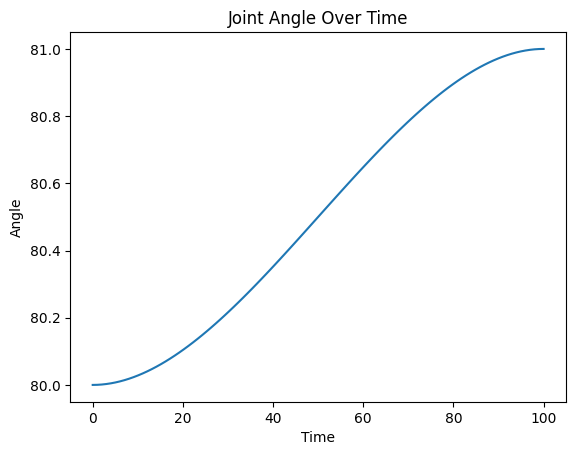

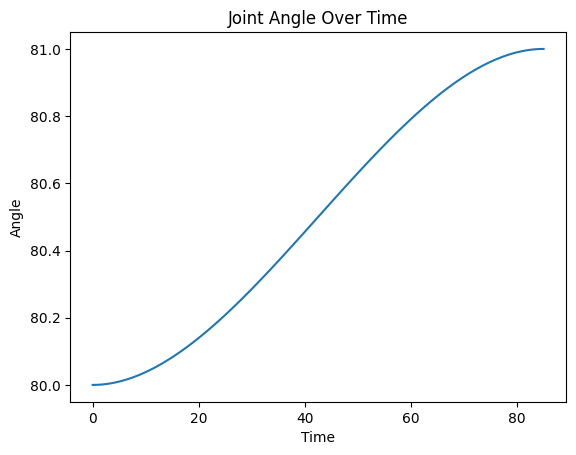

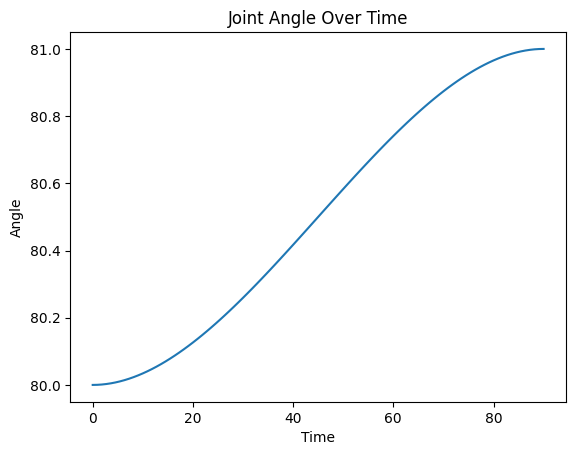

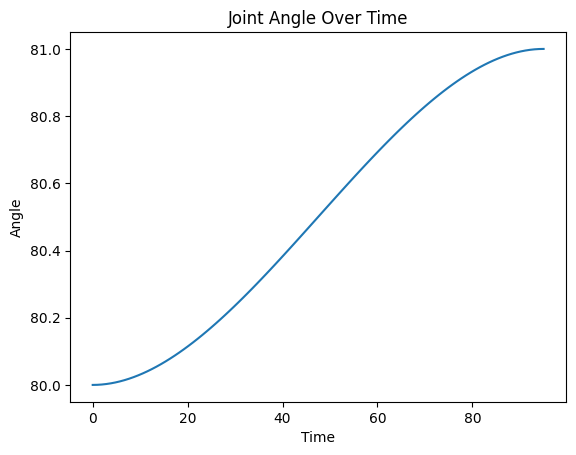

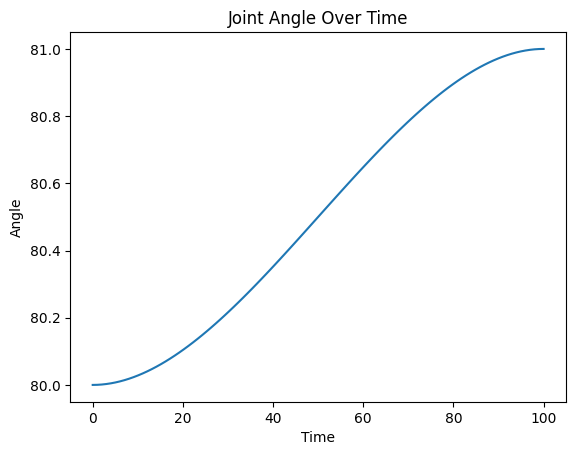

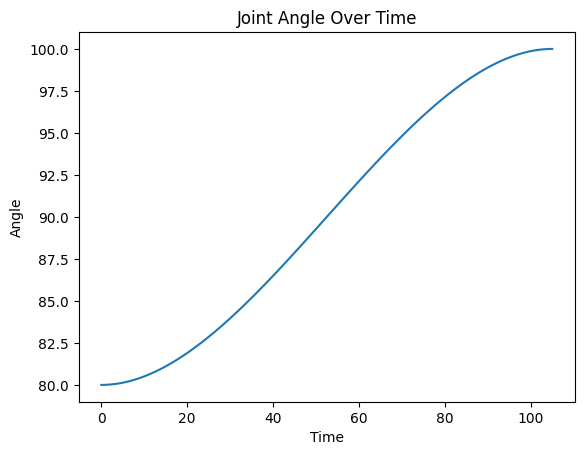

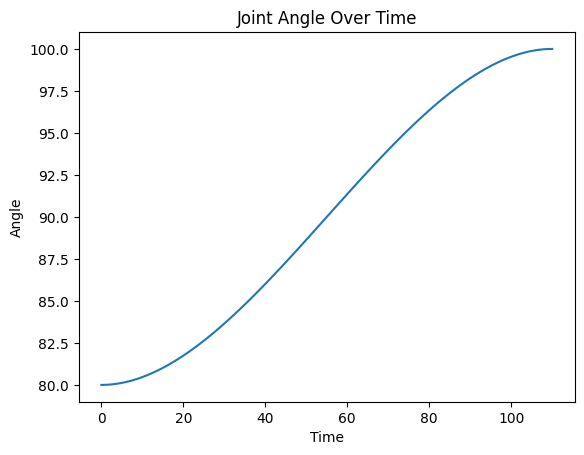

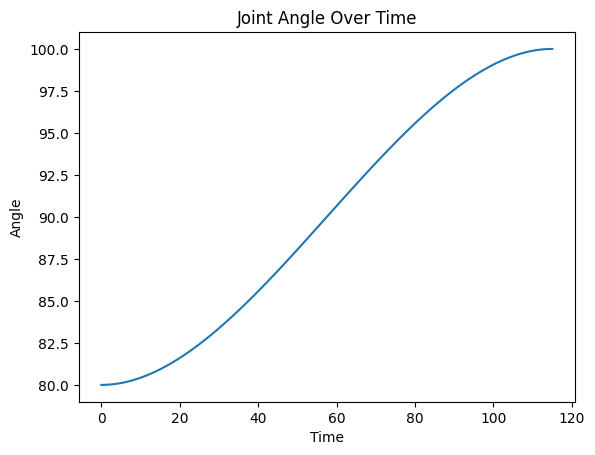

In [ ]:
trajectories_class['81,100'].plot_position_Trajectory()
trajectories_class['81,85'].plot_position_Trajectory()
trajectories_class['81,90'].plot_position_Trajectory()
trajectories_class["81,95"].plot_position_Trajectory()
trajectories_class["81,100"].plot_position_Trajectory()
trajectories_class["100,105"].plot_position_Trajectory()
trajectories_class["100,110"].plot_position_Trajectory()
trajectories["100,115"].plot_position_Trajectory()